<a href="https://colab.research.google.com/github/FelixMarschall/Logbook-ProcessDiscovery/blob/main/approach_02_including_state_AIFB_singleDay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Process Discovery on the Home Assistant logbook 

In [2]:
import pandas as pd
import pm4py
import datetime

In [3]:
data = pd.read_excel("Data.xlsx")

## Data preparation

Filter "useless" information

In [4]:
data = data.drop(["icon","domain","message","context_user_id", "context_domain", "context_service"], axis=1)

In [5]:
data = data[data.state != "unavailable"]

In [6]:
data["when"] = pd.to_datetime(data["when"])
data = data.set_index("when")

In [7]:
# create additional column, weekday and daytime
data["weekday"]= data.index.day_name()
data["case_id_day"] = data.index.strftime('%Y-%B-%d')

In [8]:
# combine state and entity_id for new column
data["state"].fillna("",inplace=True)
data["name_state"] = data["entity_id"] + "_" + data["state"]

View one period per day

In [10]:
data = data.between_time('4:00', '6:00')

In [11]:
data

,name,source,entity_id,context_id,state,context_event_type,context_name,context_message,context_source,context_entity_id,context_entity_id_name,weekday,case_id_day,name_state
when,,,,,,,,,,,,,,
2023-04-18 04:00:00.165746+00:00,Roborock S6 Reinigung,time,automation.neue_automatisierung,01GY989XN40X5CCBQYB2H0743B,,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,2023-April-18,automation.neue_automatisierung_
2023-04-18 04:00:15.235790+00:00,Roborock S6,NaN,vacuum.roborock_s6,NaN,cleaning,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,2023-April-18,vacuum.roborock_s6_cleaning
2023-04-18 04:04:45.240943+00:00,Roborock S6 Mop attached,NaN,binary_sensor.roborock_s6_mop_attached,NaN,off,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,2023-April-18,binary_sensor.roborock_s6_mop_attached_off
2023-04-18 04:04:45.241674+00:00,Roborock S6 Water box attached,NaN,binary_sensor.roborock_s6_water_box_attached,NaN,off,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,2023-April-18,binary_sensor.roborock_s6_water_box_attached_off
2023-04-18 04:04:45.242418+00:00,Roborock S6 Last clean start,NaN,sensor.roborock_s6_last_clean_start,NaN,2023-04-17T04:00:01+00:00,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,2023-April-18,sensor.roborock_s6_last_clean_start_2023-04-17...
2023-04-18 04:04:45.243040+00:00,Roborock S6 Last clean end,NaN,sensor.roborock_s6_last_clean_end,NaN,2023-04-17T05:13:58+00:00,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,2023-April-18,sensor.roborock_s6_last_clean_end_2023-04-17T0...
2023-04-18 04:04:45.253408+00:00,Roborock S6,NaN,vacuum.roborock_s6,NaN,cleaning,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,2023-April-18,vacuum.roborock_s6_cleaning
2023-04-18 04:18:04.492932+00:00,Forecast Bis,NaN,weather.bis,NaN,partlycloudy,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,2023-April-18,weather.bis_partlycloudy
2023-04-18 04:23:14.324268+00:00,Home Assistant Core Update,NaN,update.home_assistant_core_update,NaN,on,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,2023-April-18,update.home_assistant_core_update_on


Set overall timespan

In [12]:
# filter on data
#filtered_df = data.loc[(data.index >= '2023-03-20') & (data.index < '2023-04-01')]
filtered_df = data

Choose weekdays

In [13]:
weekdays = [
    'Monday',
    'Tuesday',
    'Wednesday',
    'Thursday',
    'Friday'
    #"Saturday",
    #"Sunday"
]

In [14]:
filtered_df = filtered_df[filtered_df["weekday"].isin(weekdays)]

Choose Home Assistant entities by ID

In [18]:
filtered_df.entity_id.unique()

array(['automation.neue_automatisierung', 'vacuum.roborock_s6',
       'binary_sensor.roborock_s6_mop_attached',
       'binary_sensor.roborock_s6_water_box_attached',
       'sensor.roborock_s6_last_clean_start',
       'sensor.roborock_s6_last_clean_end', 'weather.bis',
       'update.home_assistant_core_update', 'sun.sun',
       'sensor.sun_next_rising', 'fan.xiaomi_smart_air_purifier_4',
       'number.xiaomi_smart_air_purifier_4_favorite_level',
       'number.xiaomi_smart_air_purifier_4_fan_level',
       'switch.xiaomi_smart_air_purifier_4_buzzer',
       'switch.xiaomi_smart_air_purifier_4_child_lock',
       'switch.xiaomi_smart_air_purifier_4_ionizer',
       'automation.steckdose_1a_18_an', 'automation.temp_1a_18',
       'switch.tz3000_5f43h46b_ts011f_switch'], dtype=object)

In [19]:
take_entities = [
      'automation.neue_automatisierung',
      'vacuum.roborock_s6',
      'binary_sensor.roborock_s6_mop_attached',
      'binary_sensor.roborock_s6_water_box_attached',
      'sensor.roborock_s6_last_clean_start',
      'sensor.roborock_s6_last_clean_end',
      'weather.bis',
      'update.home_assistant_core_update',
      'sun.sun',
      'sensor.sun_next_rising',
      'fan.xiaomi_smart_air_purifier_4',
      'number.xiaomi_smart_air_purifier_4_favorite_level',
      'number.xiaomi_smart_air_purifier_4_fan_level',
      'switch.xiaomi_smart_air_purifier_4_buzzer',
      'switch.xiaomi_smart_air_purifier_4_child_lock',
      'switch.xiaomi_smart_air_purifier_4_ionizer',
      'automation.steckdose_1a_18_an',
      'automation.temp_1a_18',
      'switch.tz3000_5f43h46b_ts011f_switch'
    ]

In [20]:
filtered_df = filtered_df[filtered_df["entity_id"].isin(take_entities)]

Transform table for PM4Py

In [21]:
filtered_df = filtered_df.reset_index()

In [22]:
mining_data = filtered_df.rename(columns={
    'name_state':'concept:name',
    'when':'time:timestamp',
    #'weekday':'case:concept:name'
    'case_id_day':'case:concept:name'
    })

In [23]:
mining_data

,time:timestamp,name,source,entity_id,context_id,state,context_event_type,context_name,context_message,context_source,context_entity_id,context_entity_id_name,weekday,case:concept:name,concept:name
0,2023-04-18 04:00:00.165746+00:00,Roborock S6 Reinigung,time,automation.neue_automatisierung,01GY989XN40X5CCBQYB2H0743B,,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,2023-April-18,automation.neue_automatisierung_
1,2023-04-18 04:00:15.235790+00:00,Roborock S6,NaN,vacuum.roborock_s6,NaN,cleaning,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,2023-April-18,vacuum.roborock_s6_cleaning
2,2023-04-18 04:04:45.240943+00:00,Roborock S6 Mop attached,NaN,binary_sensor.roborock_s6_mop_attached,NaN,off,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,2023-April-18,binary_sensor.roborock_s6_mop_attached_off
3,2023-04-18 04:04:45.241674+00:00,Roborock S6 Water box attached,NaN,binary_sensor.roborock_s6_water_box_attached,NaN,off,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,2023-April-18,binary_sensor.roborock_s6_water_box_attached_off
4,2023-04-18 04:04:45.242418+00:00,Roborock S6 Last clean start,NaN,sensor.roborock_s6_last_clean_start,NaN,2023-04-17T04:00:01+00:00,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,2023-April-18,sensor.roborock_s6_last_clean_start_2023-04-17...
5,2023-04-18 04:04:45.243040+00:00,Roborock S6 Last clean end,NaN,sensor.roborock_s6_last_clean_end,NaN,2023-04-17T05:13:58+00:00,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,2023-April-18,sensor.roborock_s6_last_clean_end_2023-04-17T0...
6,2023-04-18 04:04:45.253408+00:00,Roborock S6,NaN,vacuum.roborock_s6,NaN,cleaning,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,2023-April-18,vacuum.roborock_s6_cleaning
7,2023-04-18 04:18:04.492932+00:00,Forecast Bis,NaN,weather.bis,NaN,partlycloudy,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,2023-April-18,weather.bis_partlycloudy
8,2023-04-18 04:23:14.324268+00:00,Home Assistant Core Update,NaN,update.home_assistant_core_update,NaN,on,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,2023-April-18,update.home_assistant_core_update_on
9,2023-04-18 04:30:25.578089+00:00,Sun,NaN,sun.sun,NaN,above_horizon,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,2023-April-18,sun.sun_above_horizon


## Process Mining


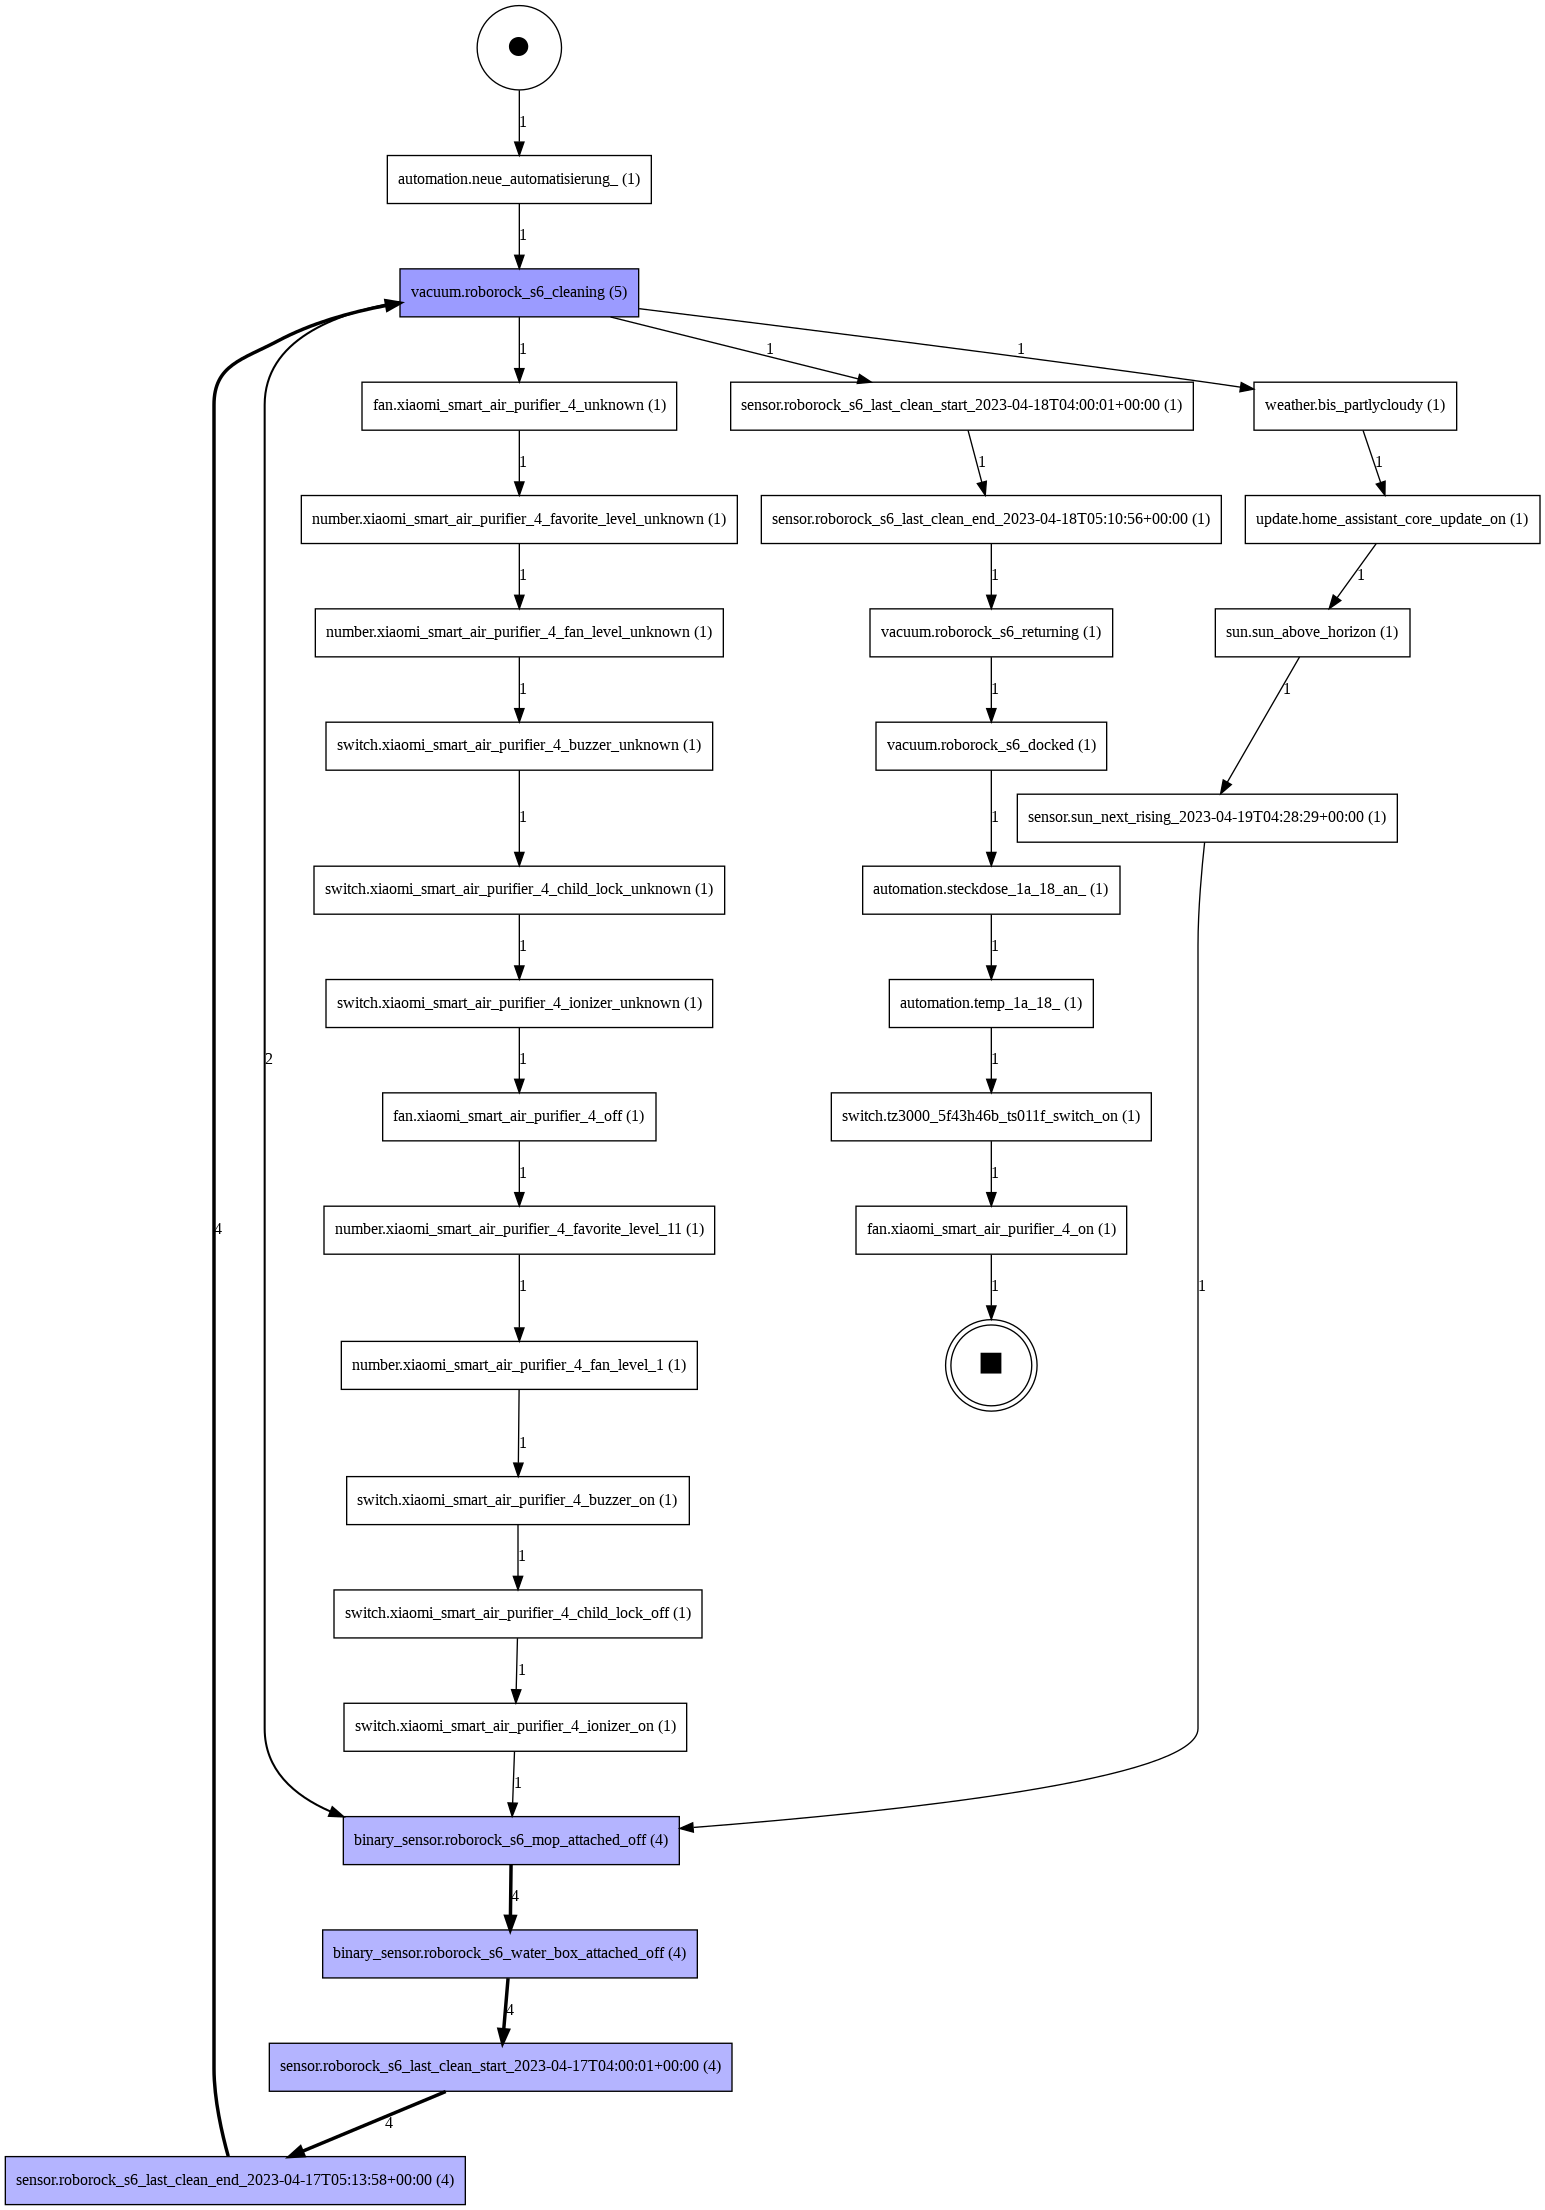

In [24]:
dfg, sa, ea = pm4py.discover_dfg(mining_data)
pm4py.vis.view_dfg(dfg, sa, ea)


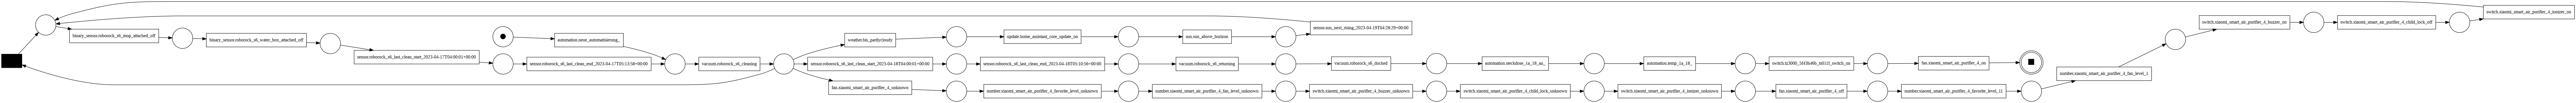

In [25]:
dfg, sa, ea = pm4py.discover_petri_net_inductive(mining_data)
pm4py.vis.view_petri_net(dfg, sa, ea)

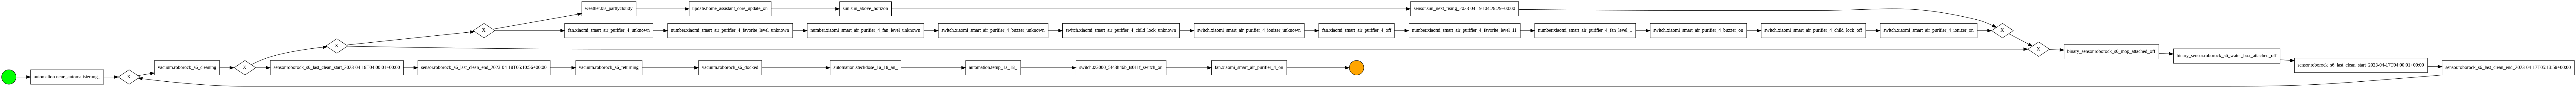

In [26]:
bpmn_graph = pm4py.discover_bpmn_inductive(mining_data)
pm4py.vis.view_bpmn(bpmn_graph)

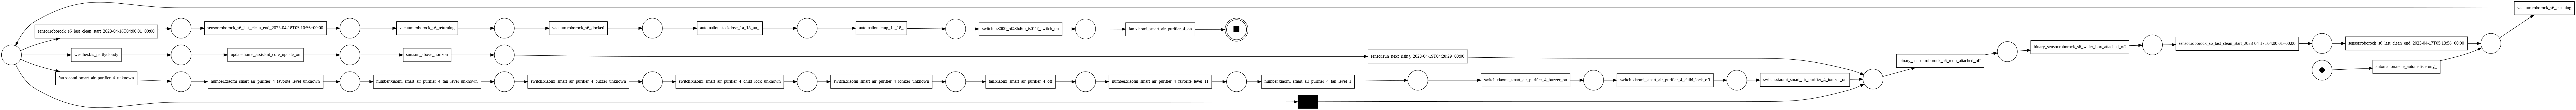

In [27]:
dfg, sa, ea = pm4py.discover_petri_net_heuristics(mining_data)
pm4py.vis.view_petri_net(dfg, sa, ea)

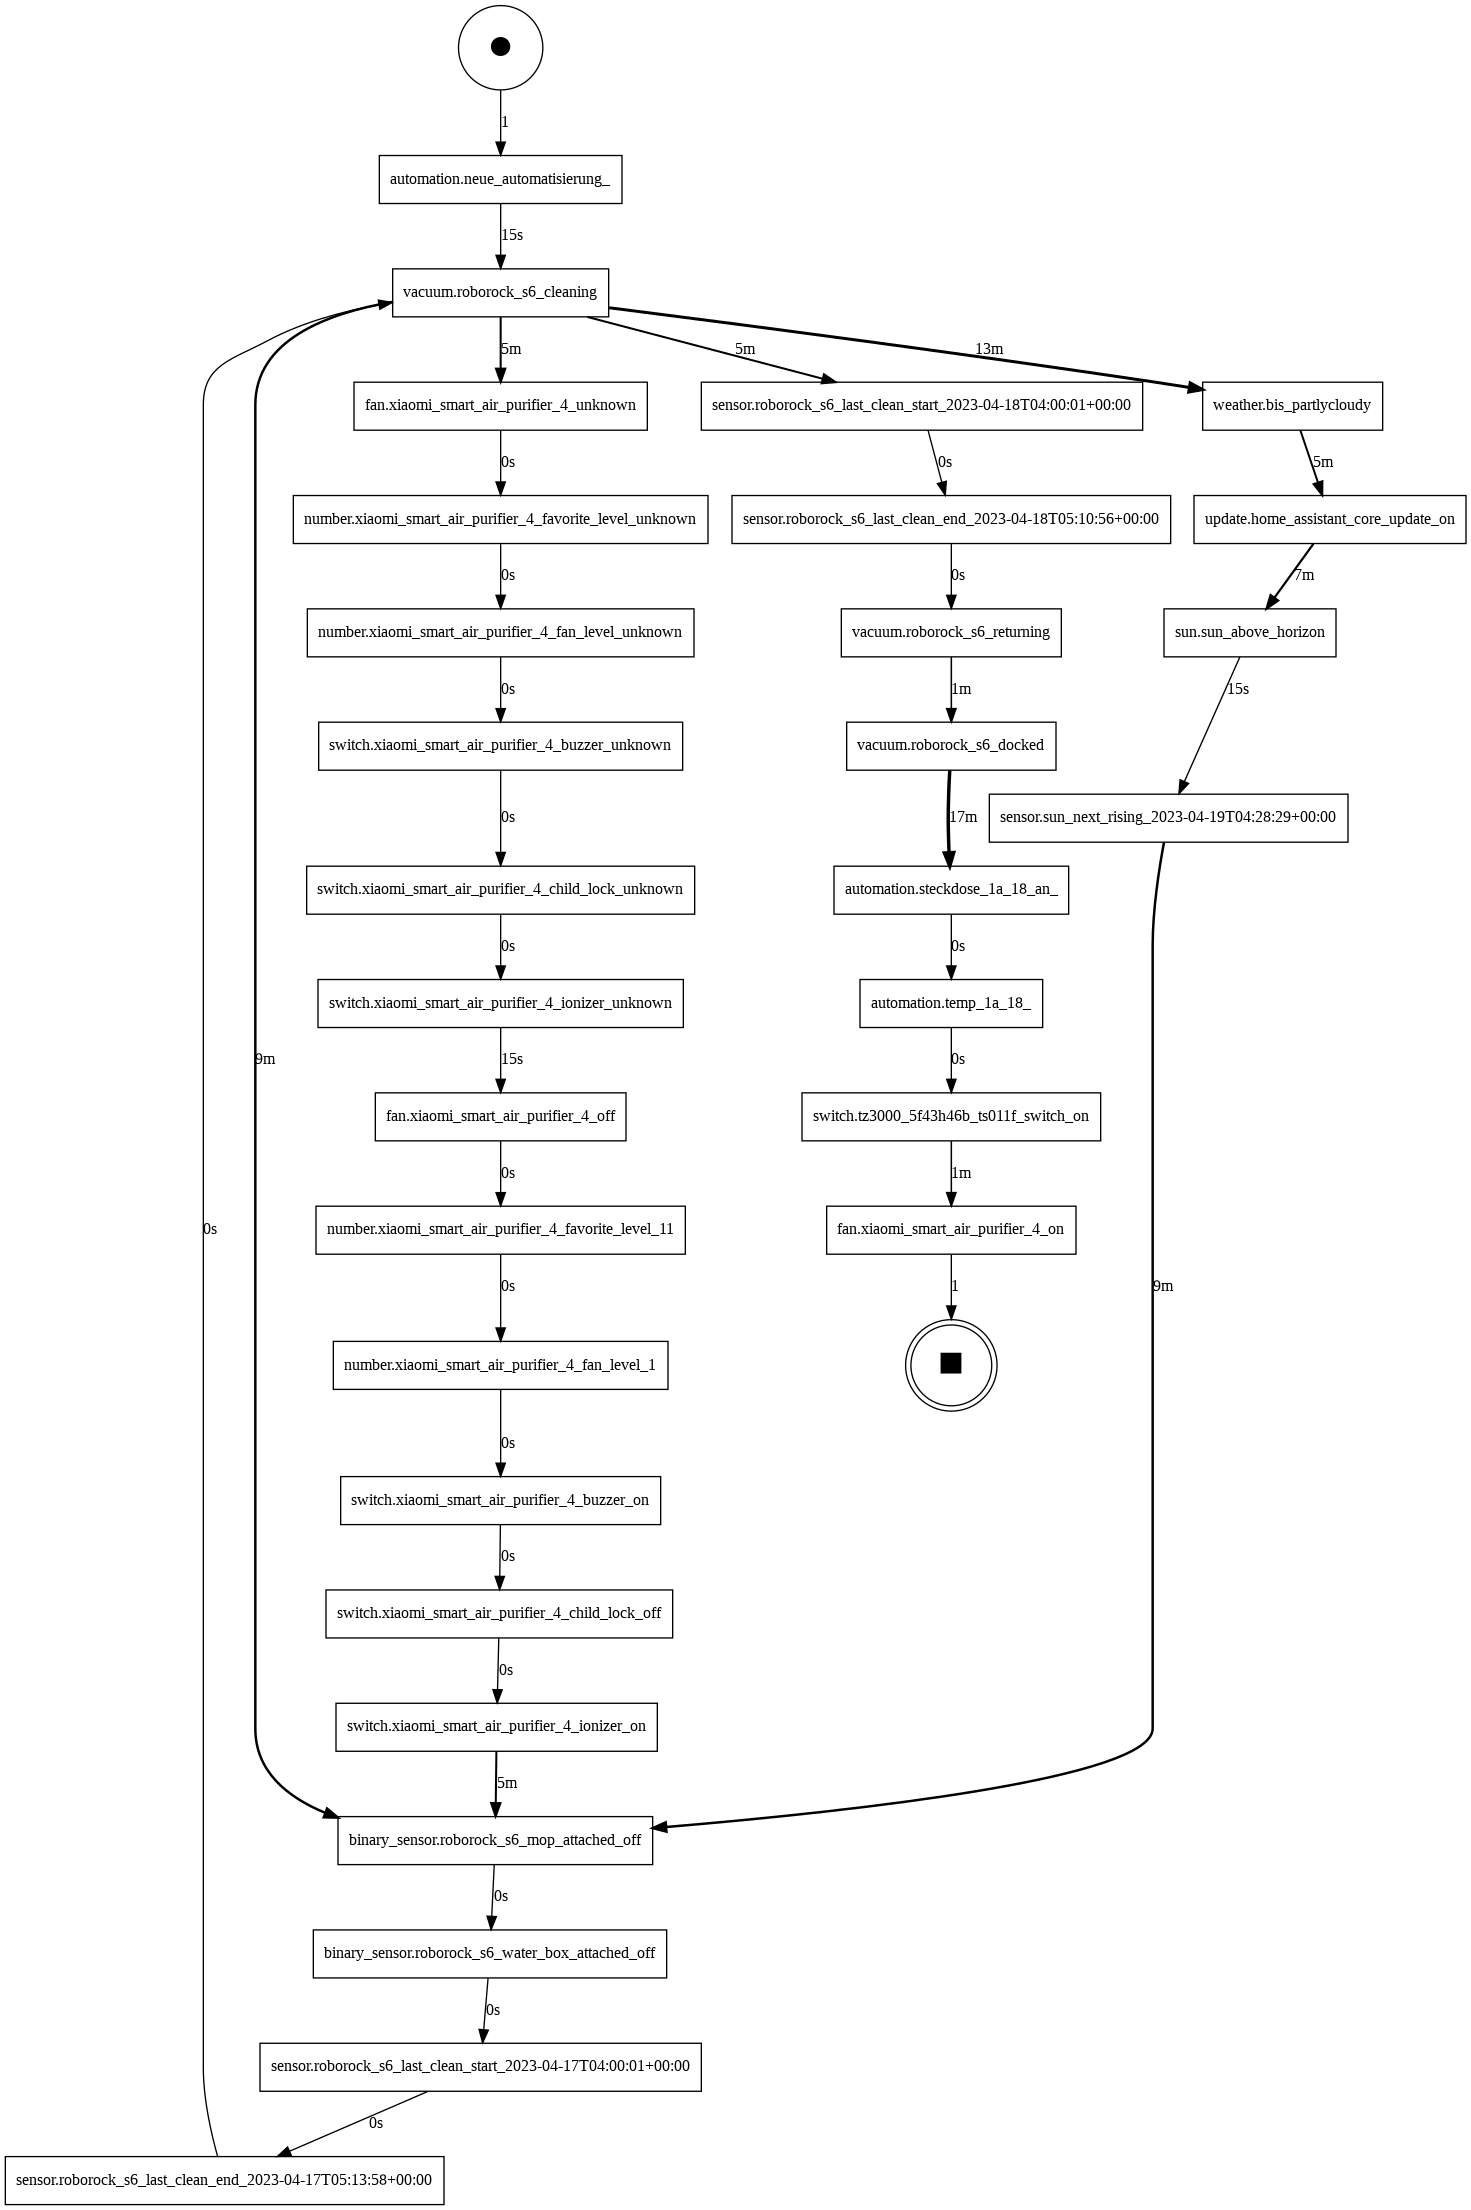

In [28]:
dfg, sa, ea = pm4py.discover_performance_dfg(mining_data)
pm4py.vis.view_performance_dfg(dfg, sa, ea)

In [31]:
mining_data.to_csv("aifb_single_day.csv", index=False)